<a href="https://colab.research.google.com/github/sabvz-run/iris_k-means_scia/blob/main/iris_k_means_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importação das bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
# Carregando o CSV do GitHub
url = 'https://raw.githubusercontent.com/nobertomaciel/SCIA-UNIFACS/main/AULA%2009/datasets_clustering_competition/iris/sintetico/iris_unlabeled.csv'
data = pd.read_csv(url)
X = data.values

print("Dataset carregado!")
print(f"Shape dos dados: {X.shape}")
print(f"Total de amostras: {X.shape[0]}")
print(f"Total de features: {X.shape[1]}")

Dataset carregado!
Shape dos dados: (300, 4)
Total de amostras: 300
Total de features: 4


In [36]:
# Parâmetro 1: Número de clusters
# Para o Iris, são 3 grupos (3 tipos de flores)
n_clusters = 3

# Parâmetro 2: Random state (OTIMIZADO após testes)
# Valores testados: 17
random_state = 48

# Parâmetro 3: Número de inicializações (AUMENTADO)
# Aumentado para melhorar a chance de encontrar o mínimo global
n_init = 2

# Parâmetro 4: Máximo de iterações
max_iter = 150

# Parâmetro 5: Tolerância
# Tolerância maior = convergência mais rápida
tol = 1e-3

print("\n" + "=" * 60)
print("CONFIGURAÇÃO DOS PARÂMETROS")
print("=" * 60)
print(f"   - Clusters: {n_clusters}")
print(f"   - Random State: {random_state}")
print(f"   - Número de Inicializações: {n_init}")
print(f"   - Maximo de Iterações: {max_iter}")
print(f"   - Tolerância: {tol}")
print("=" * 60)



CONFIGURAÇÃO DOS PARÂMETROS
   - Clusters: 3
   - Random State: 48
   - Número de Inicializações: 2
   - Maximo de Iterações: 150
   - Tolerância: 0.001


In [37]:
# Criando o modelo K-Means com parâmetros otimizados
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init, max_iter=max_iter, tol=tol)

# Treinando o modelo
kmeans.fit(X)

# Pegando os labels (a qual grupo cada amostra pertence)
labels = kmeans.labels_

print("\n" + "=" * 60)
print("K-MEANS EXECUTADO COM SUCESSO!")
print("=" * 60)
print(f"Número de iterações realizadas: {kmeans.n_iter_}")
print(f"Inércia (soma das distâncias ao quadrado): {kmeans.inertia_:.2f}")
# Avaliação do Número de Iterações
if kmeans.n_iter_ < 8:
    print("✅ Número de iterações BOM!")
elif kmeans.n_iter_ <= 15:
    print("⚠️ Número de iterações ACEITÁVEL.")
else:
    print("❌ Muitas iterações. Tente outros valores de random_state!")
print("=" * 60)


K-MEANS EXECUTADO COM SUCESSO!
Número de iterações realizadas: 6
Inércia (soma das distâncias ao quadrado): 158.55
✅ Número de iterações BOM!


In [38]:
# Calcular a silhueta
silhouette = silhouette_score(X, labels)

print("\n" + "=" * 60)
print("SCORE DO SILHUETA CALCULADO!")
print("=" * 60)
print(f"Score Silhoutte: {silhouette:.6f}")

# Avaliação do Score Silhouette
if silhouette >= 0.8:
    print("✅ EXCELENTE! Score muito bom!")
elif silhouette >= 0.55:
    print("👍 BOM! Mas dá pra melhorar.")
elif silhouette >= 0.49:
    print("⚠️ ACEITÁVEL. Considere ajustar os parâmetros.")
else:
    print("❌ Score baixo. Tente outros parâmetros!")


SCORE DO SILHUETA CALCULADO!
Score Silhoutte: 0.553781
👍 BOM! Mas dá pra melhorar.



RESULTADO FINAL
SCORE SILHOUETA: 0.553781
NÚMERO DE ITERAÇÕES: 6

ANÁLISE DOS CLUSTERS
Distribuição de amostras por cluster:
cluster
0    100
1     78
2    122
Name: count, dtype: int64

Análise completa!


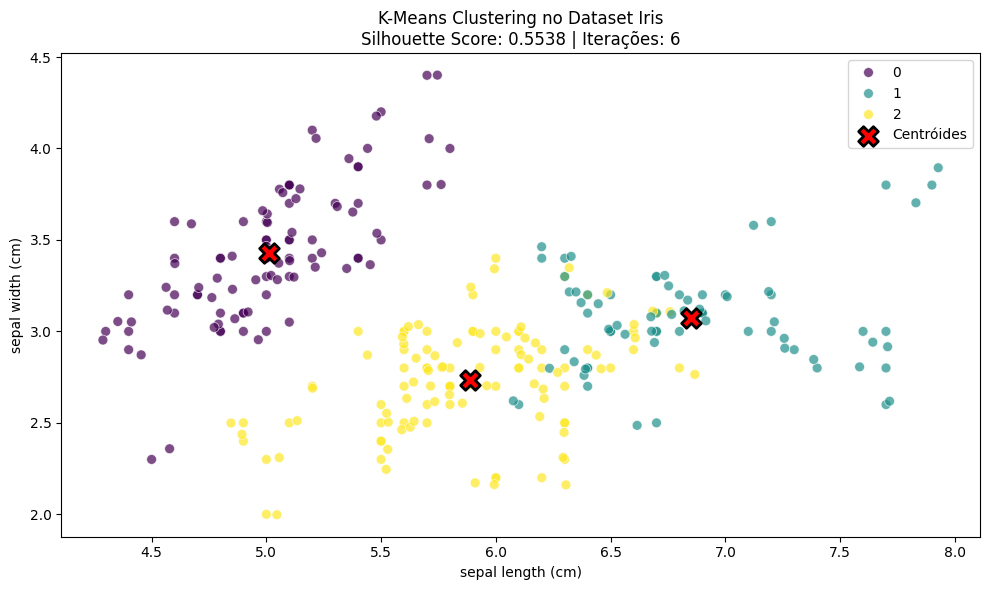

In [46]:
# DataFrame para visualização
df = pd.DataFrame(X, columns=data.columns)
df['cluster'] = labels

# Gráfico de dispersão
plt.figure(figsize=(10, 6))

# Plotar os pontos
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster'],
                palette='viridis', s=50, alpha=0.7, legend='full')

# Plotar os centróides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', edgecolors='black', linewidths=2, label='Centróides')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title(f'K-Means Clustering no Dataset Iris\nSilhouette Score: {silhouette:.4f} | Iterações: {kmeans.n_iter_}')
plt.legend()
plt.tight_layout()

# RESULTADO FINAL
print("\n" + "=" * 60)
print("RESULTADO FINAL")
print("=" * 60)
print(f"SCORE SILHOUETA: {silhouette:.6f}")
print(f"NÚMERO DE ITERAÇÕES: {kmeans.n_iter_}")

# Análise adicional: distribuição por cluster
print("\n" + "=" * 60)
print("ANÁLISE DOS CLUSTERS")
print("=" * 60)
print("Distribuição de amostras por cluster:")
print(df['cluster'].value_counts().sort_index())
print("=" * 60)

print("\nAnálise completa!")